<a href="https://colab.research.google.com/github/Bachechu/python/blob/main/24.05.31%20%EC%8B%A4%EC%8A%B5%20%EA%B3%BC%EC%A0%9C%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

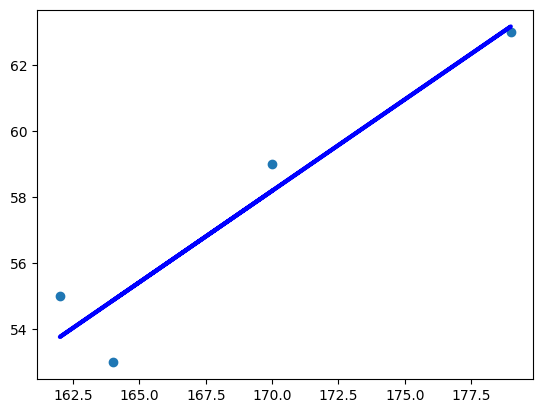

In [6]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# 데이터 준비
X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]

# 선형 회귀 모델 생성
regr = linear_model.LinearRegression()

# 모델에 데이터 적용
regr.fit(X, y)

# 예측값 생성
y_pred = regr.predict(X)

# 데이터와 예측 결과 시각화
plt.scatter(X, y)
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

Correlation Matrix:
           Area     Yield
Area   1.000000  0.940099
Yield  0.940099  1.000000
Predicted yields for areas 7 and 12 are: [191.11863882 322.57319232]


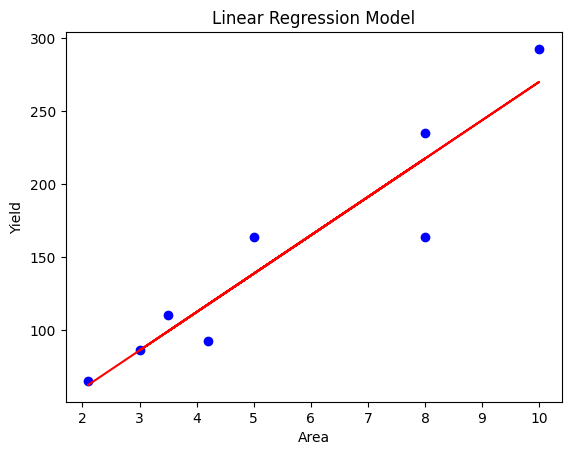

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 데이터 준비
data = {
    'Area': [2.1, 10, 3, 8, 3.5, 5, 8, 4.2],
    'Yield': [64.9, 292.6, 85.9, 235.2, 110.5, 163.4, 163.4, 92.3]
}
df = pd.DataFrame(data)

# 상관도 분석
correlation = df.corr()
print("Correlation Matrix:")
print(correlation)

# 선형 회귀 알고리즘 객체 생성
linear_regressor = LinearRegression()

# 학습을 위한 데이터 준비
X = df[['Area']].values
y = df['Yield'].values

# 선형 회귀 객체 모델의 학습 수행
linear_regressor.fit(X, y)

# 예측값 생성
areas_to_predict = np.array([[7], [12]])
predictions = linear_regressor.predict(areas_to_predict)
print(f"Predicted yields for areas 7 and 12 are: {predictions}")

# 시각화
plt.scatter(X, y, color='blue')
plt.plot(X, linear_regressor.predict(X), color='red')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.title('Linear Regression Model')
plt.show()


In [15]:
# 1. 간단한 샘플 데이터 생성
parents_height = [[180,165], [175,160], [180,172], [165,160], [171,152]]
child_height = [3, 2, 2, 1, 1]

# 2. 사이킷런(Scikit-Learn) 결정트리 모델 생성
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

# 3. 모델에 데이터 적용
dt_model.fit(parents_height, child_height)

# 4. 예측하기
dt_pred = dt_model.predict([[175, 153]])
dt_pred


array([2])

In [17]:
import pandas as pd

std_df = pd.read_csv('Student_Marks.csv')
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [18]:
std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [19]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [20]:
std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [21]:
std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [22]:
std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


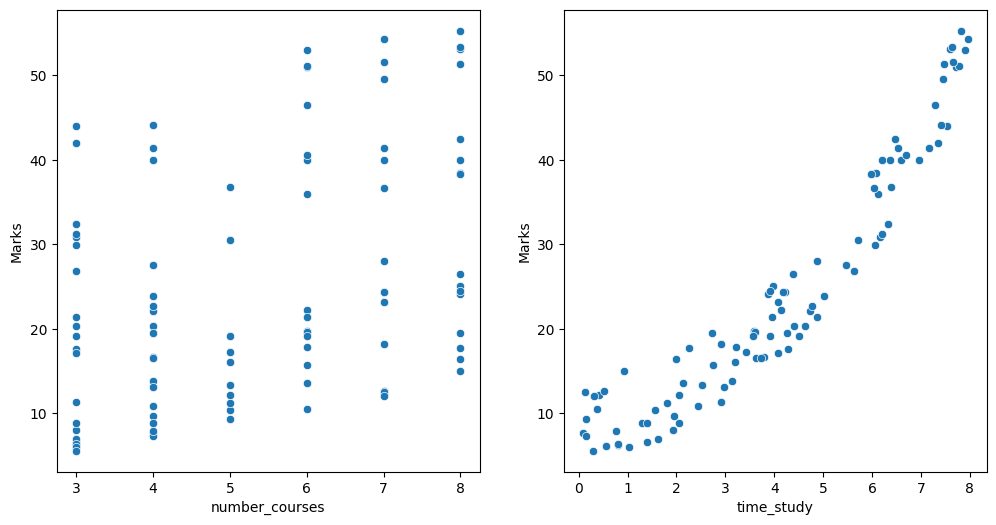

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses',y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x='time_study',y='Marks', ax=ax[1])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x=std_df.drop('Marks',axis=1)
y=std_df['Marks']
X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [27]:
lr_model.fit(X_train,Y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr_pred=lr_model.predict(X_test)

r2_score(lr_pred, Y_test)
mean_squared_error(lr_pred,Y_test)

14.200726136374552

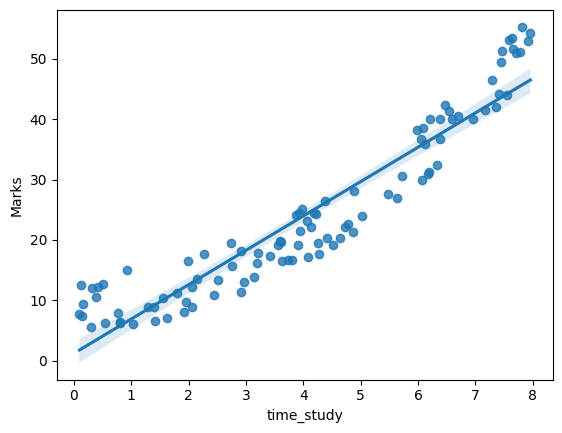

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=std_df['time_study'],y=std_df['Marks'])
plt.show()